In [1]:
from keras.datasets import mnist
from keras.utils import np_utils, plot_model
from keras.callbacks import EarlyStopping

from numpy.random.mtrand import _rand as global_randstate
global_randstate.seed(666)

import os
os.environ['PATH']+=os.pathsep+'C:\\Program Files (x86)\\Graphviz2.38\\bin'

from models import * 
from utils import * 

c:\users\nildip.mukherjee\appdata\local\continuum\anaconda3\envs\python_36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


c:\users\nildip.mukherjee\appdata\local\continuum\anaconda3\envs\python_36\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  if __name__ == '__main__':
c:\users\nildip.mukherjee\appdata\local\continuum\anaconda3\envs\python_36\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  # Remove the CWD from sys.path while we load stuff.


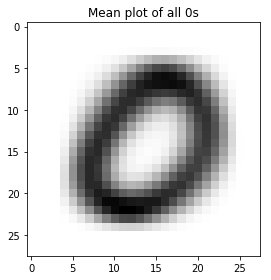

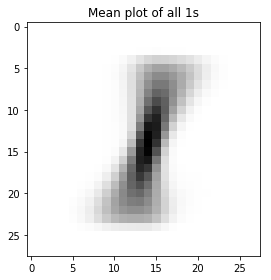

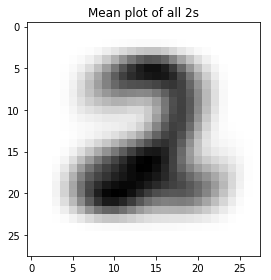

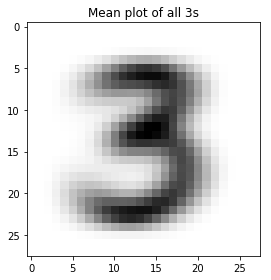

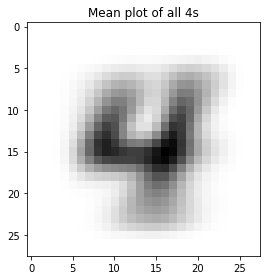

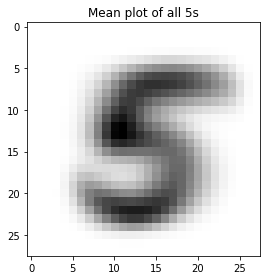

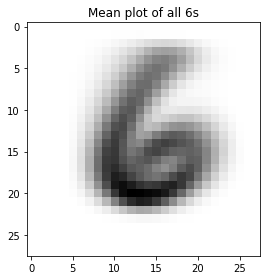

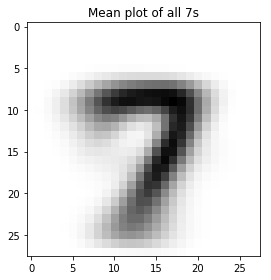

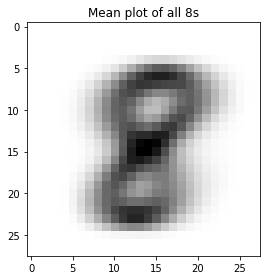

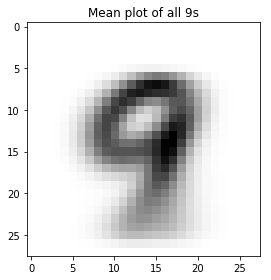

In [2]:
# loading the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# normalizing the values
X_train = X_train / 255
X_test = X_test / 255

# reshaping data for 2D CNN
X_train_2D = np.expand_dims(X_train, axis=4)
X_test_2D = np.expand_dims(X_test, axis=4)

# reshaping data for 1D CNN
X_train_1D = np.expand_dims(X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]).astype('float32'), axis = 2)
X_test_1D = np.expand_dims(X_test.reshape(X_test.shape[0], X_train.shape[1]*X_train.shape[2]).astype('float32'), axis = 2)

# reshaping data for basic NN
X_train_nn = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]).astype('float32')
X_test_nn = X_test.reshape(X_test.shape[0], X_train.shape[1]*X_train.shape[2]).astype('float32')

# one hot encode output
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

# plotting the average image for each number
for i in range(0,10):
    plt.figure()
    plt.title('Mean plot of all {0}s'.format(i))
    plt.tight_layout()
    plt.imshow(np.mean(X_train[np.where(y_train == i)], axis=0), cmap = plt.get_cmap('gray_r'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               50100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)                2525      
_________________________________________________________________
dropout_3 (Dropout)          (None, 25)                0         
__________

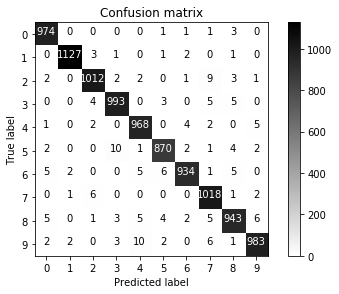

In [3]:
model = simple_nn(10,784)
model.summary()
# print model structure to png file
plot_model(model, to_file='model_simple_nn.png', show_shapes = True)
# complile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# Fit the model
early_stopping = EarlyStopping(monitor = 'val_loss', patience=2)
model.fit(X_train_nn, Y_train, validation_data = (X_test_nn, Y_test), epochs=200, batch_size=200, callbacks=[early_stopping])
# Final evaluation of the model
scores = model.evaluate(X_test_nn, Y_test, verbose=0)
print("Model Error: %.2f%%" % (100-scores[1]*100))
# plotting the confusion matrix
plot_confusion_matrix(y_test, model.predict(X_test_nn).argmax(axis= 1), classes=[0,1,2,3,4,5,6,7,8,9])

C:\Users\Nildip.mukherjee\AnacondaProjects\Others\MNIST\models.py:29: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(kernel_size=15, strides=1, activation="relu", filters=5)`
  cnn_layer = Conv1D(nb_filter = 5, kernel_size = 15, strides = 1, activation = 'relu')(input_shape)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784, 1)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 770, 5)            80        
_________________________________________________________________
dropout_4 (Dropout)          (None, 770, 5)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 385, 5)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1925)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               963000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 500)               0         
__________

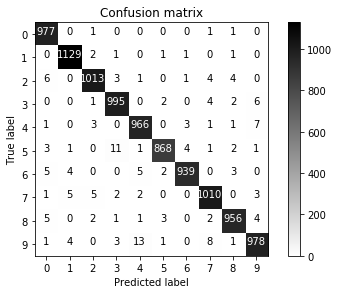

In [4]:
model = simple_1Dcnn(10,784)
model.summary()
# print model structure to png file
plot_model(model, to_file='model_simple_1Dcnn.png', show_shapes = True)
# complile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# Fit the model
early_stopping = EarlyStopping(monitor = 'val_loss', patience=2)
model.fit(X_train_1D, Y_train, validation_data = (X_test_1D, Y_test), epochs=200, batch_size=200, callbacks=[early_stopping])
# Final evaluation of the model
scores = model.evaluate(X_test_1D, Y_test, verbose=0)
print("Model Error: %.2f%%" % (100-scores[1]*100))
# plotting the confusion matrix
plot_confusion_matrix(y_test, model.predict(X_test_1D).argmax(axis= 1), classes=[0,1,2,3,4,5,6,7,8,9])

C:\Users\Nildip.mukherjee\AnacondaProjects\Others\MNIST\models.py:52: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=15, strides=1, activation="relu", filters=5)`
  cnn_layer = Conv2D(nb_filter = 5, kernel_size = 15, strides = 1, activation = 'relu')(input_shape)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 5)         1130      
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 5)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 5)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 245)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 500)               123000    
_________________________________________________________________
dropout_8 (Dropout)          (None, 500)               0         
__________

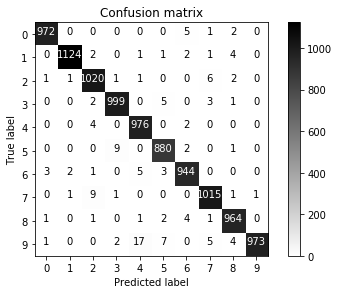

In [5]:
model = simple_2Dcnn(10,28,28)
model.summary()
# print model structure to png file
plot_model(model, to_file='model_simple_2Dcnn.png', show_shapes = True)
# complile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# Fit the model
early_stopping = EarlyStopping(monitor = 'val_loss', patience=2)
model.fit(X_train_2D, Y_train, validation_data = (X_test_2D, Y_test), epochs=200, batch_size=200, callbacks=[early_stopping])
# Final evaluation of the model
scores = model.evaluate(X_test_2D, Y_test, verbose=0)
print("Model Error: %.2f%%" % (100-scores[1]*100))
# plotting the confusion matrix
plot_confusion_matrix(y_test, model.predict(X_test_2D).argmax(axis= 1), classes=[0,1,2,3,4,5,6,7,8,9])

C:\Users\Nildip.mukherjee\AnacondaProjects\Others\MNIST\models.py:75: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(kernel_size=15, strides=1, activation="relu", filters=5)`
  cnn_layer = Conv1D(nb_filter = 5, kernel_size = 15, strides = 1, activation = 'relu')(input_shape)
C:\Users\Nildip.mukherjee\AnacondaProjects\Others\MNIST\models.py:78: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(kernel_size=10, strides=1, activation="relu", filters=4)`
  cnn_layer = Conv1D(nb_filter = 4, kernel_size = 10, strides = 1, activation = 'relu')(input_shape)
C:\Users\Nildip.mukherjee\AnacondaProjects\Others\MNIST\models.py:81: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(kernel_size=5, strides=1, activation="relu", filters=4)`
  cnn_layer = Conv1D(nb_filter = 4, kernel_size = 5, strides = 1, activation = 'relu')(input_shape)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784, 1)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 780, 4)            24        
_________________________________________________________________
dropout_12 (Dropout)         (None, 780, 4)            0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 390, 4)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1560)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 500)               780500    
_________________________________________________________________
dropout_13 (Dropout)         (None, 500)               0         
__________

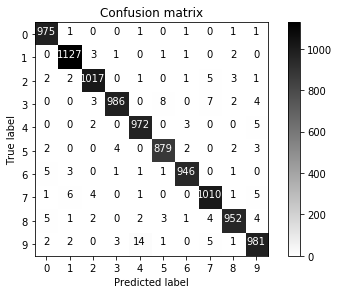

In [6]:
model = stacked_1Dcnn(10,784)
model.summary()
# print model structure to png file
plot_model(model, to_file='model_stacked_1Dcnn.png', show_shapes = True)
# complile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# Fit the model
early_stopping = EarlyStopping(monitor = 'val_loss', patience=2)
model.fit(X_train_1D, Y_train, validation_data = (X_test_1D, Y_test), epochs=200, batch_size=200, callbacks=[early_stopping])
# Final evaluation of the model
scores = model.evaluate(X_test_1D, Y_test, verbose=0)
print("Model Error: %.2f%%" % (100-scores[1]*100))
# plotting the confusion matrix
plot_confusion_matrix(y_test, model.predict(X_test_1D).argmax(axis= 1), classes=[0,1,2,3,4,5,6,7,8,9])

C:\Users\Nildip.mukherjee\AnacondaProjects\Others\MNIST\models.py:104: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=15, strides=1, activation="relu", filters=5)`
  cnn_layer = Conv2D(nb_filter = 5, kernel_size = 15, strides = 1, activation = 'relu')(input_shape)
C:\Users\Nildip.mukherjee\AnacondaProjects\Others\MNIST\models.py:107: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=10, strides=1, activation="relu", filters=4)`
  cnn_layer = Conv2D(nb_filter = 4, kernel_size = 10, strides = 1, activation = 'relu')(input_shape)
C:\Users\Nildip.mukherjee\AnacondaProjects\Others\MNIST\models.py:110: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=5, strides=1, activation="relu", filters=4)`
  cnn_layer = Conv2D(nb_filter = 4, kernel_size = 5, strides = 1, activation = 'relu')(input_shape)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 4)         104       
_________________________________________________________________
dropout_17 (Dropout)         (None, 24, 24, 4)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 4)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 500)               288500    
_________________________________________________________________
dropout_18 (Dropout)         (None, 500)               0         
__________

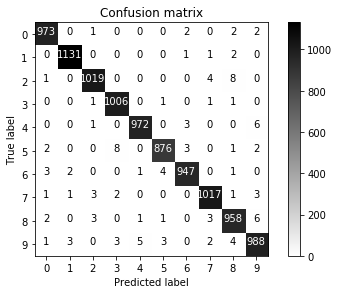

In [7]:
model = stacked_2Dcnn(10,28,28)
model.summary()
# print model structure to png file
plot_model(model, to_file='model_stacked_2Dcnn.png', show_shapes = True)
# complile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# Fit the model
early_stopping = EarlyStopping(monitor = 'val_loss', patience=2)
model.fit(X_train_2D, Y_train, validation_data = (X_test_2D, Y_test), epochs=200, batch_size=200, callbacks=[early_stopping])
# Final evaluation of the model
scores = model.evaluate(X_test_2D, Y_test, verbose=0)
print("Model Error: %.2f%%" % (100-scores[1]*100))
# plotting the confusion matrix
plot_confusion_matrix(y_test, model.predict(X_test_2D).argmax(axis= 1), classes=[0,1,2,3,4,5,6,7,8,9])

C:\Users\Nildip.mukherjee\AnacondaProjects\Others\MNIST\models.py:133: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=15, strides=1, activation="relu", filters=4)`
  tower1 = Conv2D(nb_filter = 4, kernel_size = 15, strides = 1, activation = 'relu')(input_shape)
C:\Users\Nildip.mukherjee\AnacondaProjects\Others\MNIST\models.py:137: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=15, strides=1, activation="relu", filters=4)`
  tower2 = Conv2D(nb_filter = 4, kernel_size = 15, strides = 1, activation = 'relu')(input_shape)
C:\Users\Nildip.mukherjee\AnacondaProjects\Others\MNIST\models.py:141: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=15, strides=1, activation="relu", filters=4)`
  tower3 = Conv2D(nb_filter = 4, kernel_size = 15, strides = 1, activation = 'relu')(input_shape)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 14, 14, 4)    904         input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 14, 14, 4)    904         input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 14, 14, 4)    904         input_6[0][0]                    
__________________________________________________________________________________________________
dropout_20

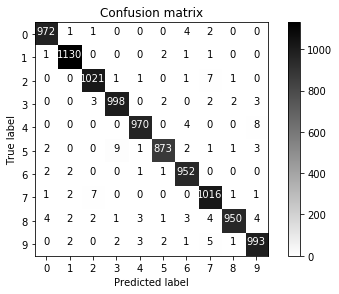

In [8]:
model = multitower_2Dcnn(10,28,28)
model.summary()
# print model structure to png file
plot_model(model, to_file='model_multitower_2Dcnn.png', show_shapes = True)
# complile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# Fit the model
early_stopping = EarlyStopping(monitor = 'val_loss', patience=2)
model.fit(X_train_2D, Y_train, validation_data = (X_test_2D, Y_test), epochs=200, batch_size=200, callbacks=[early_stopping])
# Final evaluation of the model
scores = model.evaluate(X_test_2D, Y_test, verbose=0)
print("Model Error: %.2f%%" % (100-scores[1]*100))
# plotting the confusion matrix
plot_confusion_matrix(y_test, model.predict(X_test_2D).argmax(axis= 1), classes=[0,1,2,3,4,5,6,7,8,9])

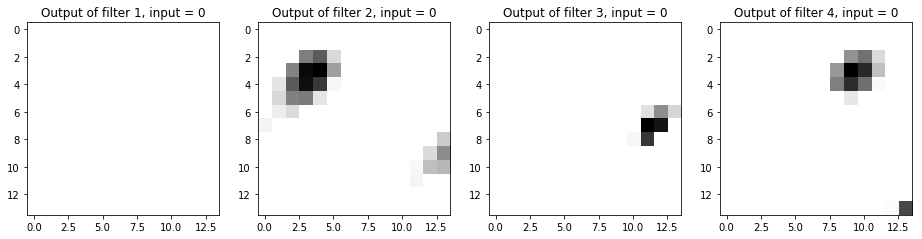

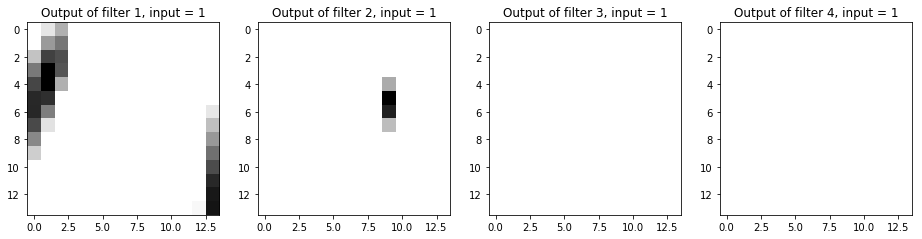

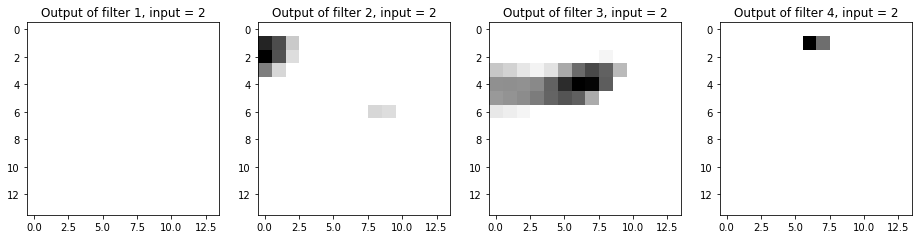

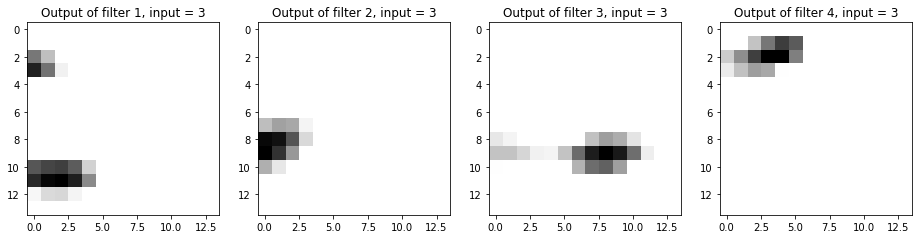

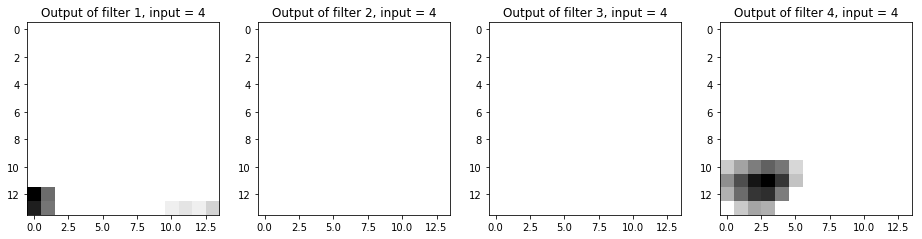

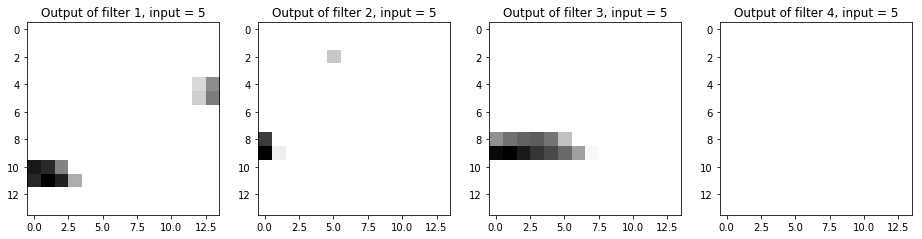

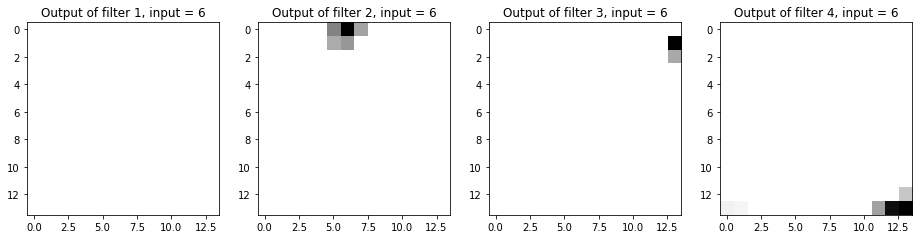

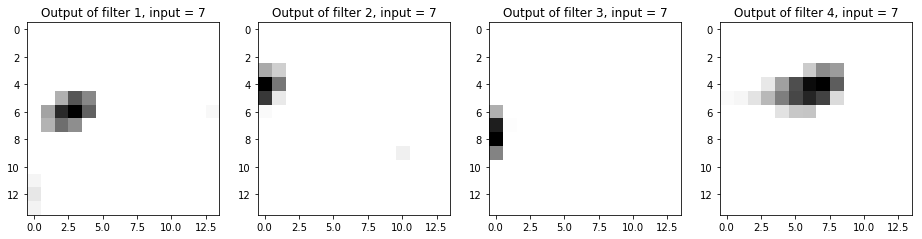

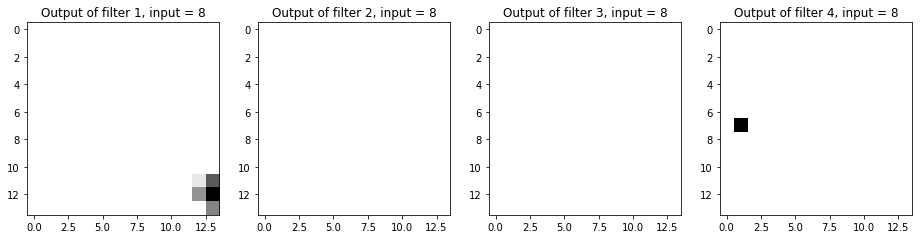

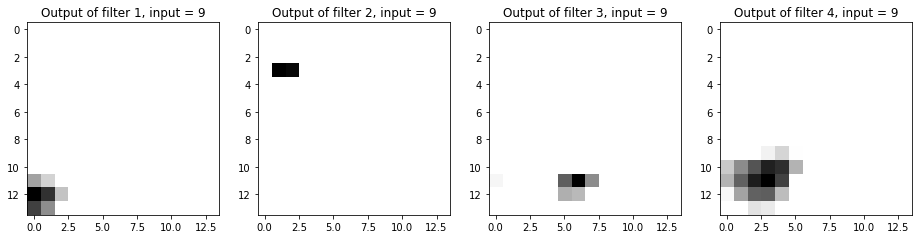

In [9]:
# passing average image for each number to one of the CNN filters and plotting the output
visualize_filter(model, X_test, y_test, 1)

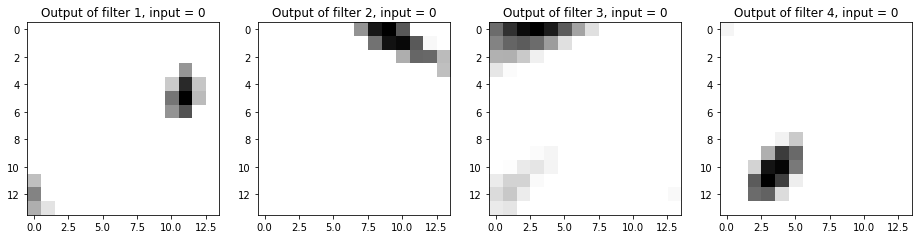

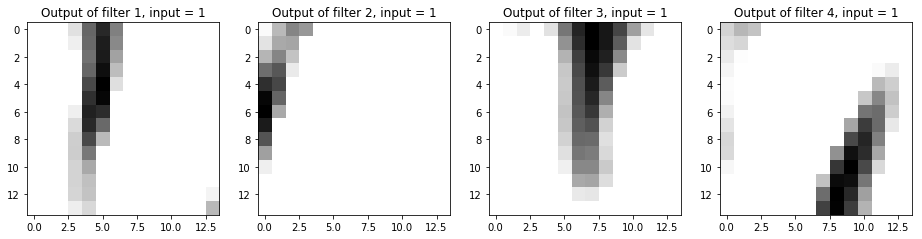

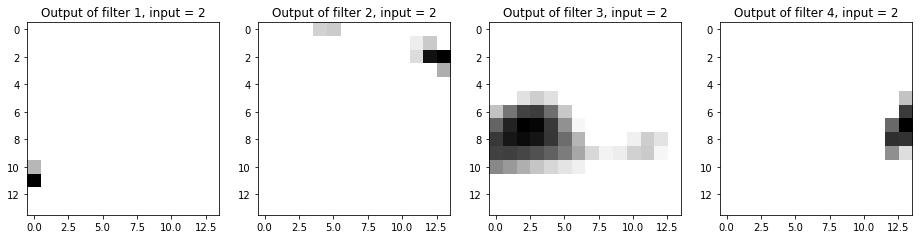

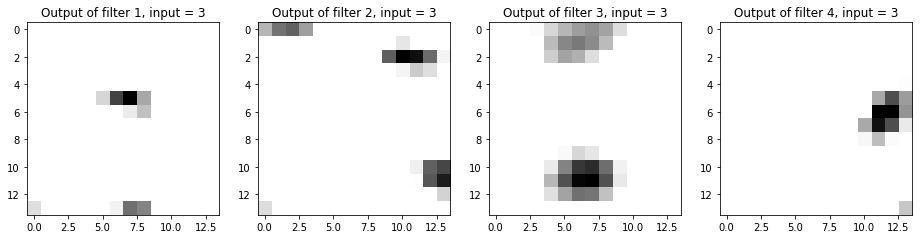

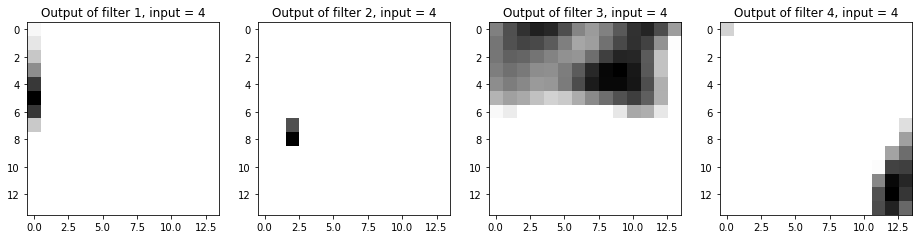

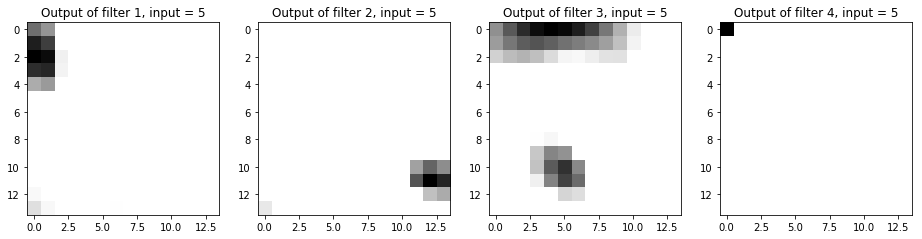

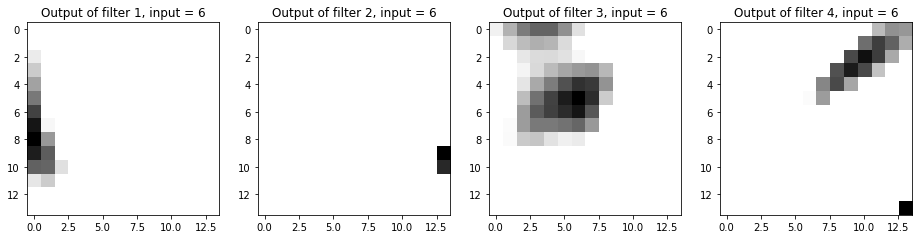

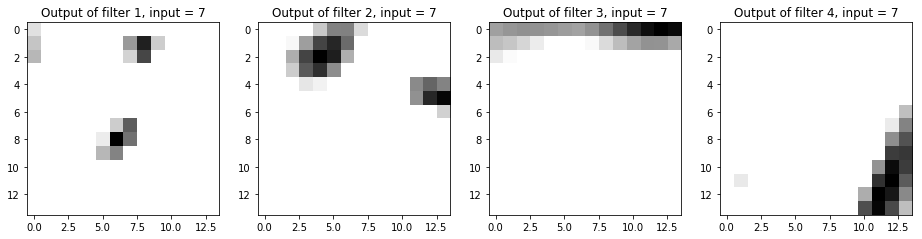

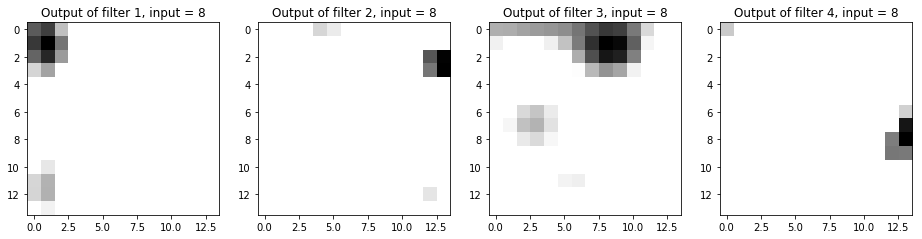

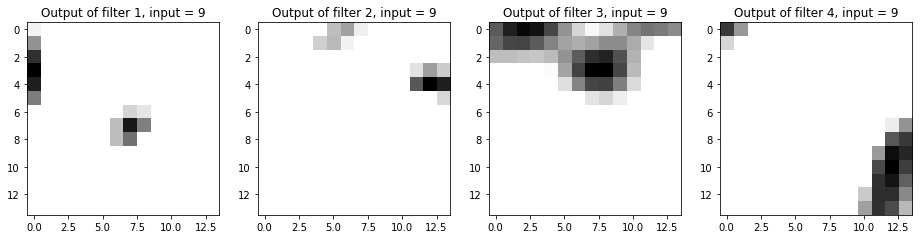

In [10]:
# passing average image for each number to one of the CNN filters and plotting the output
visualize_filter(model, X_test, y_test, 2)

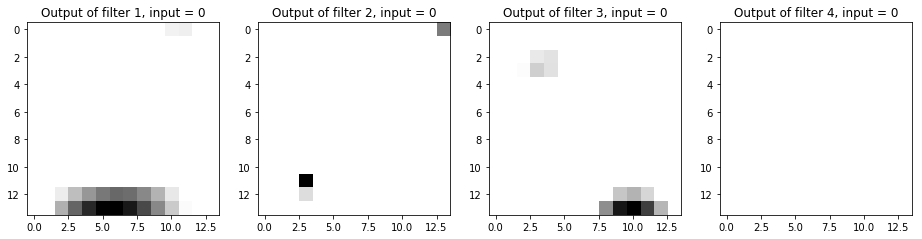

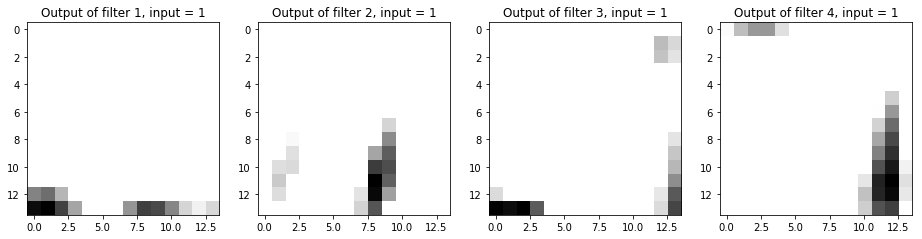

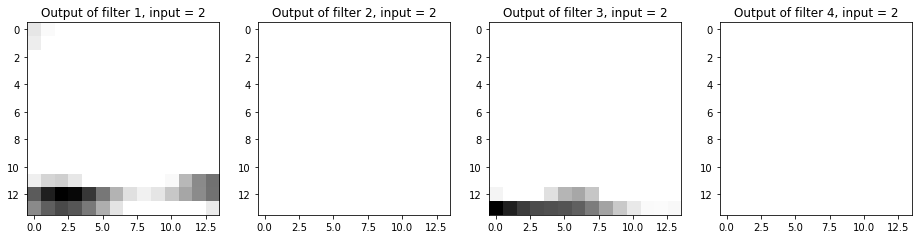

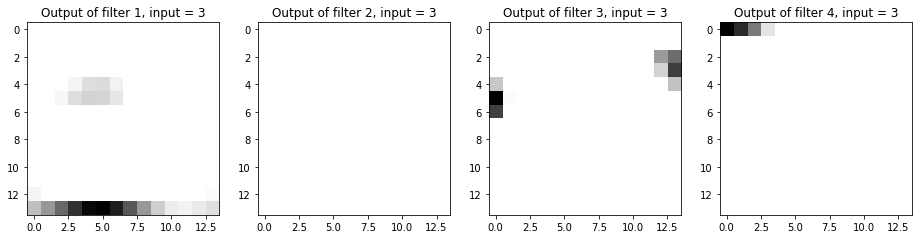

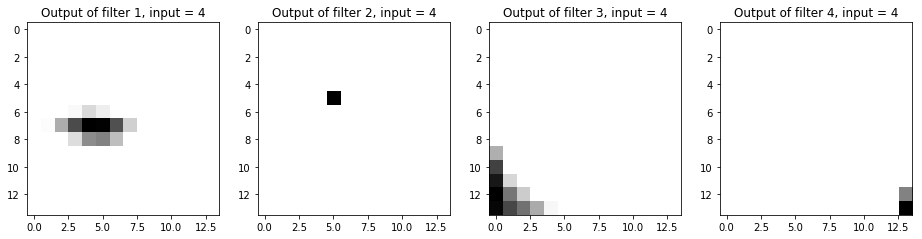

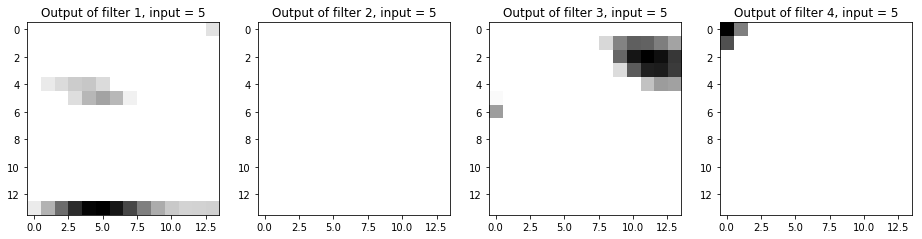

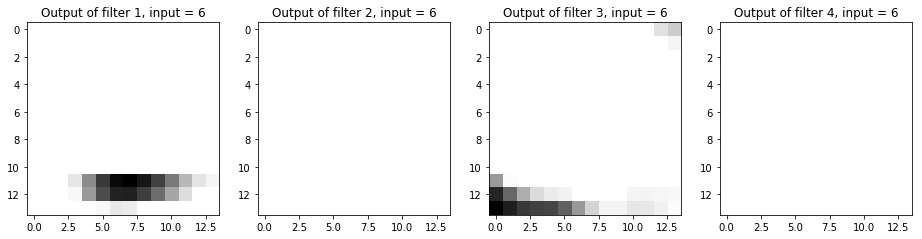

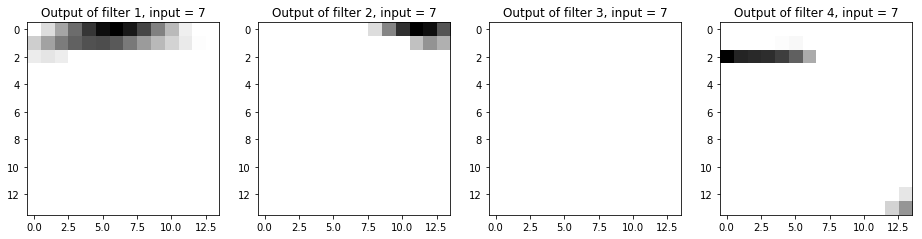

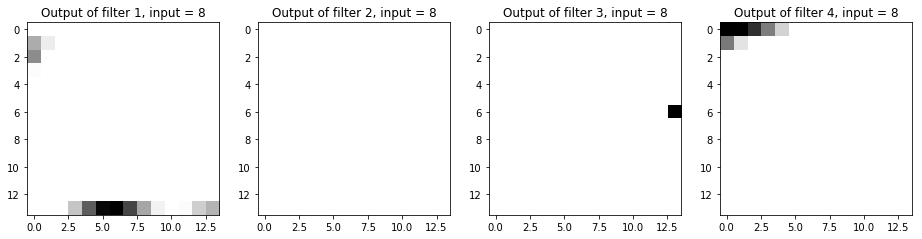

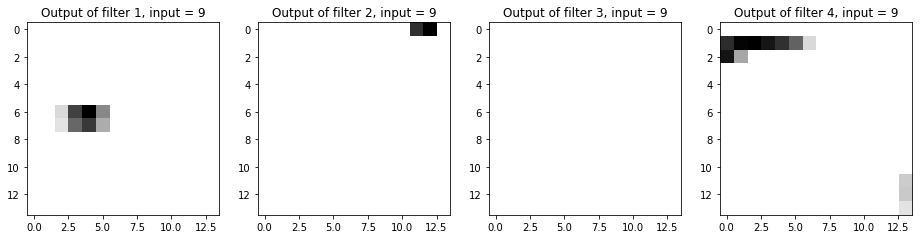

In [11]:
# passing average image for each number to one of the CNN filters and plotting the output
visualize_filter(model, X_test, y_test, 3)